In [1]:
# import multiprocessing
# multiprocessing.set_start_method("fork")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import stan  ## pystan
%matplotlib inline

In [3]:
plt.style.use("ggplot")

In [4]:
df = pd.read_excel("./data/real_estate1.xlsx")

In [5]:
df.head()

,id,space,room,value
0,1,50,2LDK,3050
1,2,70,2LDK,4690
2,3,70,2SLDK,4830
3,4,70,3LDK,5040
4,5,90,3LDK,6570


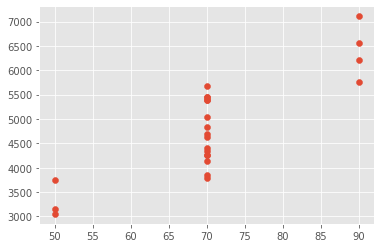

In [6]:
plt.scatter(df["space"],df["value"]);

N:サンプル数  
X:説明変数（広さ）  
Y:目的変数（価格）

In [7]:
stan_model = """
data {
  int N;
  real X[N];
  real Y[N];
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  for (n in 1:N){
    Y[n] ~ normal(a * X[n] + b, sigma);
  }
}

"""

In [8]:
# stan_data = {"N":df.shape[0], "X":df["space"],"Y":df["value"]}

stan_data = {"N":df.shape[0], 
             "X":df["space"].values,
             "Y":df["value"].values}

In [9]:
# sm = pystan.StanModel(model_code = stan_model)
# fit = sm.sampling(data = stan_data, iter=2000, warmup=500, chains = 3, seed=123)

In [10]:
# fit

In [11]:
import nest_asyncio
nest_asyncio.apply()

In [12]:
posterior = stan.build(stan_model, data=stan_data, random_seed=123)
fit = posterior.sample(num_chains=3, num_samples=1500, num_warmup=500, save_warmup=0)

Building...



Building: found in cache, done.Messages from stanc:
Warning in '/tmp/httpstan_p_78big8/model_z3nila67.stan', line 4, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/tmp/httpstan_p_78big8/model_z3nila67.stan', line 5, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Sampling:   0%
Sampling:  33% (2000/6000)
Sampling:  67% (4000/6000)
Sampling: 100% (6000/6000)
Sampling: 100% (6000/6000), done.
Messages received during sampling:
  Gradient evaluation took 4.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.41 seconds.
  Adjust you

In [13]:
df_fit = fit.to_frame()
df_fit.describe().T

,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
lp__,4500.0,-152.051543,1.408166,-163.800614,-152.611212,-151.687401,-151.042554,-150.400881
accept_stat__,4500.0,0.937572,0.095145,0.263646,0.917931,0.976142,0.995889,1.000000
stepsize__,4500.0,0.099721,0.011330,0.084447,0.084447,0.103169,0.111546,0.111546
treedepth__,4500.0,3.930222,1.148468,1.000000,3.000000,4.000000,5.000000,6.000000
n_leapfrog__,4500.0,25.152000,15.734630,1.000000,15.000000,31.000000,31.000000,63.000000
divergent__,4500.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
energy__,4500.0,153.559290,1.897641,150.524750,152.171898,153.169890,154.568442,165.115189
a,4500.0,77.678818,12.412112,20.924998,69.782886,77.634187,85.559534,121.821602
b,4500.0,-670.400670,896.240903,-4133.933980,-1237.539014,-662.249035,-104.405674,3564.805836


In [14]:
# fig = fit.plot()

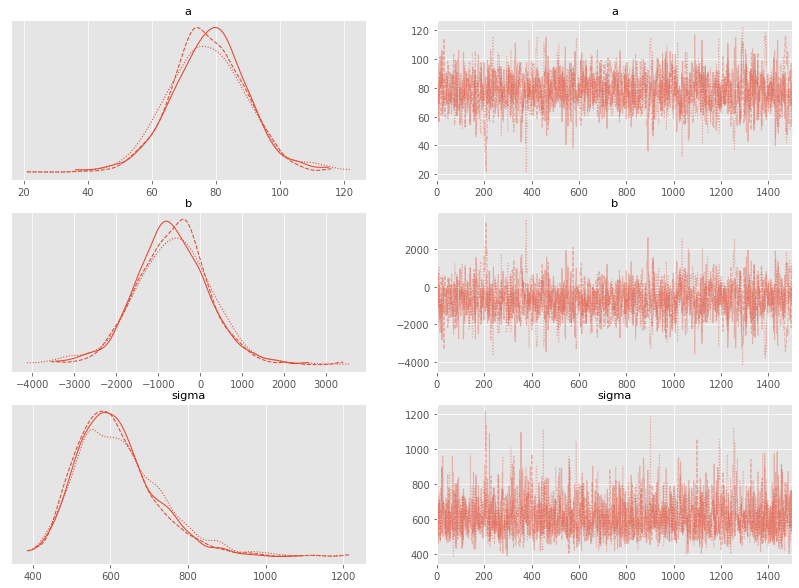

In [15]:
import arviz
arviz.plot_trace(fit, figsize=(14,10));

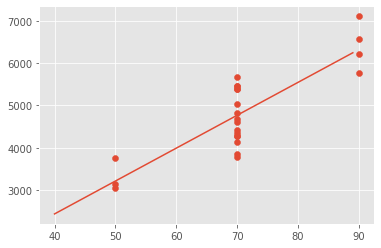

In [16]:
a = 77.8  # 78.3
b = -677.75  # -713.7
x = np.arange(40,90,1)
y = a * x + b
plt.plot(x,y)
plt.scatter(df["space"],df["value"]);

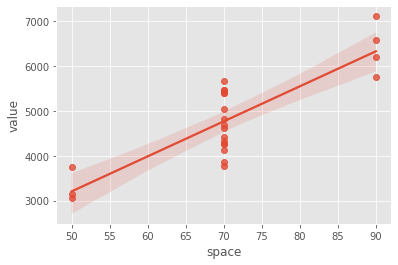

In [17]:
import seaborn as sns
sns.regplot(x=df["space"], y=df["value"]);